In [16]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import tensorflowjs as tfjs
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pipeline.prepare import prepare_data_tfds, prepare_data_kaggle
from pipeline.model import create_model
from pipeline.evaluate import plot_learning_curves
from pipeline.utils import timer
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution2D, MaxPool2D, Dropout, BatchNormalization, Conv2D, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
x_train, x_test, y_train, y_test = prepare_data_tfds('the300w_lp', 'landmarks_3d', 1000)

In [13]:
input_shape = (450,450,3)
output_length = 136

In [48]:
@timer
def run_model(model, epochs=25):
    return model.fit(x_train, y_train, batch_size=50, epochs=epochs, validation_data =(x_test, y_test))

# Basis-Model
- Convolutaional Neural Network
- Max Pooling
- Dense Layers

In [26]:
inputs = Input(shape=input_shape, name="image_input")
x = keras.layers.experimental.preprocessing.Normalization()(inputs)

x = Convolution2D(16, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Convolution2D(32, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Convolution2D(64, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Convolution2D(128, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Convolution2D(256, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(output_length)(x)

model = Model(inputs=inputs, outputs=outputs, name="deepmoji")
model.compile(optimizer='adam', 
      loss='mean_squared_error')

In [27]:
history = run_model(model)

Epoch 1/25
15/15 [==============================] - 56s 4s/step - loss: 42316.9572 - val_loss: 7686.7690
Epoch 2/25
15/15 [==============================] - 52s 4s/step - loss: 6778.3475 - val_loss: 5284.0776
Epoch 3/25
15/15 [==============================] - 53s 4s/step - loss: 4032.4106 - val_loss: 4038.0979
Epoch 4/25
15/15 [==============================] - 53s 4s/step - loss: 3185.1054 - val_loss: 3355.6946
Epoch 5/25
15/15 [==============================] - 55s 4s/step - loss: 2689.4102 - val_loss: 2936.1743
Epoch 6/25
15/15 [==============================] - 54s 4s/step - loss: 2324.4928 - val_loss: 2869.8608
Epoch 7/25
15/15 [==============================] - 53s 4s/step - loss: 2214.9401 - val_loss: 2690.7717
Epoch 8/25
15/15 [==============================] - 53s 4s/step - loss: 1878.7482 - val_loss: 2243.5137
Epoch 9/25
15/15 [==============================] - 54s 4s/step - loss: 1713.5985 - val_loss: 2156.7488
Epoch 10/25
15/15 [==============================] - 53s 4s/ste

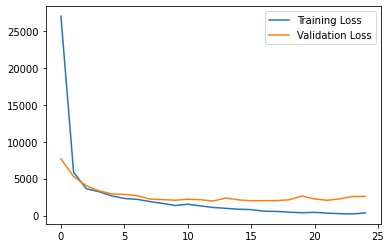

In [28]:
plot_learning_curves(history)

# Optimize training time
- Batch Normalization

In [58]:
inputs = Input(shape=input_shape, name="image_input")
x = keras.layers.experimental.preprocessing.Normalization()(inputs)

x = Convolution2D(16, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Convolution2D(32, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Convolution2D(64, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Convolution2D(128, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Convolution2D(256, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(output_length)(x)

model = Model(inputs=inputs, outputs=outputs, name="deepmoji")
model.compile(optimizer='adam', 
      loss='mean_squared_error')

In [31]:
history = run_model(model)

Epoch 1/25
15/15 [==============================] - 75s 5s/step - loss: 42521.7462 - val_loss: 22979.5957
Epoch 2/25
15/15 [==============================] - 72s 5s/step - loss: 2717.5319 - val_loss: 8773.0518
Epoch 3/25
15/15 [==============================] - 71s 5s/step - loss: 1242.7669 - val_loss: 13384.3184
Epoch 4/25
15/15 [==============================] - 70s 5s/step - loss: 929.8634 - val_loss: 15998.4756
Epoch 5/25
15/15 [==============================] - 70s 5s/step - loss: 713.9472 - val_loss: 11761.0420
Epoch 6/25
15/15 [==============================] - 70s 5s/step - loss: 500.5643 - val_loss: 14828.5977
Epoch 7/25
15/15 [==============================] - 71s 5s/step - loss: 475.2095 - val_loss: 11713.4297
Epoch 8/25
15/15 [==============================] - 72s 5s/step - loss: 366.3750 - val_loss: 13422.7627
Epoch 9/25
15/15 [==============================] - 71s 5s/step - loss: 257.4986 - val_loss: 10357.0098
Epoch 10/25
15/15 [==============================] - 72s 5s/s

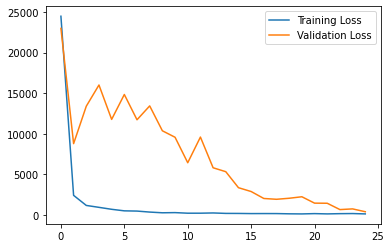

In [32]:
plot_learning_curves(history)

# Prevent overfitting
- Dropout 0.5

In [33]:
inputs = Input(shape=input_shape, name="image_input")
x = keras.layers.experimental.preprocessing.Normalization()(inputs)

x = Convolution2D(16, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Convolution2D(32, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Convolution2D(64, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Convolution2D(128, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Convolution2D(256, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(output_length)(x)

model = Model(inputs=inputs, outputs=outputs, name="deepmoji")
model.compile(optimizer='adam', 
      loss='mean_squared_error')

In [34]:
history = run_model(model)

Epoch 1/25
15/15 [==============================] - 124s 8s/step - loss: 47913.9436 - val_loss: 43553.0664
Epoch 2/25
15/15 [==============================] - 121s 8s/step - loss: 11580.6968 - val_loss: 29720.7285
Epoch 3/25
15/15 [==============================] - 121s 8s/step - loss: 7062.3831 - val_loss: 19310.8184
Epoch 4/25
15/15 [==============================] - 120s 8s/step - loss: 5711.9040 - val_loss: 6906.6670
Epoch 5/25
15/15 [==============================] - 117s 8s/step - loss: 5583.5352 - val_loss: 6374.5610
Epoch 6/25
15/15 [==============================] - 119s 8s/step - loss: 4712.1090 - val_loss: 3434.1975
Epoch 7/25
15/15 [==============================] - 119s 8s/step - loss: 4681.9555 - val_loss: 5831.0923
Epoch 8/25
15/15 [==============================] - 119s 8s/step - loss: 4083.8627 - val_loss: 5643.4985
Epoch 9/25
15/15 [==============================] - 120s 8s/step - loss: 4044.1043 - val_loss: 7824.4575
Epoch 10/25
15/15 [==============================]

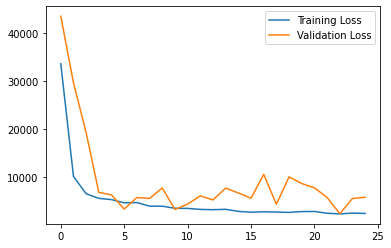

In [36]:
plot_learning_curves(history)

# Prevent overfitting
- Dropout 0.1

In [38]:
inputs = Input(shape=input_shape, name="image_input")
x = keras.layers.experimental.preprocessing.Normalization()(inputs)

x = Convolution2D(16, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Convolution2D(32, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Convolution2D(64, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Convolution2D(128, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Convolution2D(256, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.1)(x)
outputs = Dense(output_length)(x)

model = Model(inputs=inputs, outputs=outputs, name="deepmoji")
model.compile(optimizer='adam', 
      loss='mean_squared_error')

In [39]:
history = run_model(model)

Epoch 1/25
15/15 [==============================] - 122s 8s/step - loss: 44502.0131 - val_loss: 34658.3906
Epoch 2/25
15/15 [==============================] - 121s 8s/step - loss: 4564.4287 - val_loss: 9968.1240
Epoch 3/25
15/15 [==============================] - 121s 8s/step - loss: 2714.5503 - val_loss: 9221.2168
Epoch 4/25
15/15 [==============================] - 121s 8s/step - loss: 2159.0813 - val_loss: 26379.4004
Epoch 5/25
15/15 [==============================] - 121s 8s/step - loss: 1820.0389 - val_loss: 21125.1465
Epoch 6/25
15/15 [==============================] - 121s 8s/step - loss: 1714.4554 - val_loss: 27685.1758
Epoch 7/25
15/15 [==============================] - 121s 8s/step - loss: 1387.3690 - val_loss: 18644.6641
Epoch 8/25
15/15 [==============================] - 122s 8s/step - loss: 1263.9091 - val_loss: 9267.6406
Epoch 9/25
15/15 [==============================] - 120s 8s/step - loss: 1345.4417 - val_loss: 4849.0273
Epoch 10/25
15/15 [==============================

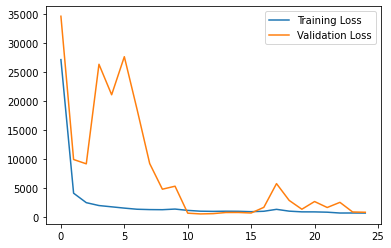

In [40]:
plot_learning_curves(history)

# Try more epochs
- 50 epochs

In [46]:
inputs = Input(shape=input_shape, name="image_input")
x = keras.layers.experimental.preprocessing.Normalization()(inputs)

x = Convolution2D(16, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Convolution2D(32, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Convolution2D(64, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Convolution2D(128, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Convolution2D(256, (3,3), activation = 'relu', padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.1)(x)
outputs = Dense(output_length)(x)

model = Model(inputs=inputs, outputs=outputs, name="deepmoji")
model.compile(optimizer=tf.keras.optimizers.Adam(), 
      loss='mean_squared_error')

In [50]:
history = run_model(model, 50)

Epoch 1/50
15/15 [==============================] - 121s 8s/step - loss: 685.3481 - val_loss: 3673.8931
Epoch 2/50
15/15 [==============================] - 118s 8s/step - loss: 828.0439 - val_loss: 2187.6836
Epoch 3/50
15/15 [==============================] - 122s 8s/step - loss: 795.6127 - val_loss: 1687.5034
Epoch 4/50
15/15 [==============================] - 119s 8s/step - loss: 763.0541 - val_loss: 7763.7241
Epoch 5/50
15/15 [==============================] - 121s 8s/step - loss: 658.4693 - val_loss: 5318.8252
Epoch 6/50
15/15 [==============================] - 122s 8s/step - loss: 631.9597 - val_loss: 3915.2605
Epoch 7/50
15/15 [==============================] - 121s 8s/step - loss: 628.3869 - val_loss: 4280.9038
Epoch 8/50
15/15 [==============================] - 119s 8s/step - loss: 664.2848 - val_loss: 2981.9897
Epoch 9/50
15/15 [==============================] - 120s 8s/step - loss: 679.5985 - val_loss: 3637.4333
Epoch 10/50
15/15 [==============================] - 121s 8s/ste

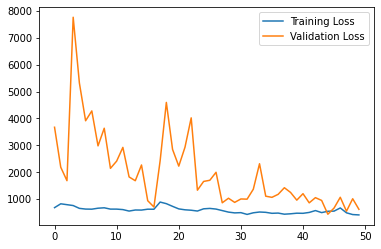

In [51]:
plot_learning_curves(history)